## 1. Importing Libraries

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import csv
import numpy as np

from get_credentials import get_credentials
from extract_playlist import extract_playlist
from artistsgenres_dummies import artistsgenres_dummies

from sklearn import preprocessing

## 2. Import Data

In [2]:
cid,secret = get_credentials()

# Adding the Playlist link and URI.
# Liked Songs - 4000 songs
# songs_to_add_link = "https://open.spotify.com/playlist/5F5yHyXHt6vp2taA7DrEhJ?si=b4f82e9651444f28"
# # Gym - 500 songs
# playlist_link = "https://open.spotify.com/playlist/5CYdyJ0w4OVc1oitZWQvj3?si=76db4826bb254432"

# Liked Songs mask - 80 songs
songs_to_add_link = "https://open.spotify.com/playlist/3ZqPfj9NrumTSN8mANanIK?si=bbded8c33a274d55"
# Gym mask - 20 songs
playlist_link = "https://open.spotify.com/playlist/5dFBFbT5ZmJruYvK8IVd6c?si=80cad7f1d80b49cd"

# # Spotify Playlist Generator - 16 songs
# playlist_link = "https://open.spotify.com/playlist/7LaicnuGlBjUoHZ5Rd4tjm?si=e9f47ebd992b4d08"

# # NN Test
# # Gym mask - 20 songs
# songs_to_add_link = "https://open.spotify.com/playlist/5dFBFbT5ZmJruYvK8IVd6c?si=80cad7f1d80b49cd"

in txt


In [3]:
df_p = extract_playlist(playlist_link,cid,secret)
df_p.to_csv('Playlist_p.csv', encoding='utf-8', index = False)
print(df_p.shape)

In [ ]:
df_sta = extract_playlist(songs_to_add_link,cid,secret)
print(df_sta.shape)

In [ ]:
df_sta = df_sta.reset_index(drop=True)
df_p = df_p.reset_index(drop=True)

In [ ]:
df_sta.to_csv('Playlist_sta.csv', encoding='utf-8', index = False)
df_p.to_csv('Playlist_p.csv', encoding='utf-8', index = False)
# df.head()

In [ ]:
df_sta['in playlist'] = -2
df_p['in playlist'] = 1

In [ ]:
ip = []

# # df_unlabelled = df_sta_ag.loc[~((df_sta_ag.song_fil.isin(df_p['song_fil']))&(df_sta_ag.artists_fil.isin(df_p['artists_fil']))),:]
for index, row in df_sta.iterrows():
    for index2, row2 in df_p.iterrows():
        if row['song_fil'] == row2['song_fil'] and row['artists_fil'] == row2['artists_fil']:
            print(row['song_fil'], row['artists_fil'])
            in_playlist = index
            ip.append(in_playlist)

print(len(ip))
print(ip)

animal i have become three days grace
amazing kanye west, jeezy
ante up - remix m.o.p., busta rhymes, teflon, remi martin
2 seater ybn nahmir, g-eazy, offset
anxiety black eyed peas, papa roach
animal vicetone, jordan powers, bekah novi
all nite - getter remix destructo, e-40, too $hort, getter
all signs point to lauderdale a day to remember
ante up (robbin hoodz theory) m.o.p.
9
[23, 59, 65, 91, 94, 115, 141, 142, 143]


In [ ]:
df_u = df_sta.copy()
df_l = df_p.copy()

df_u.drop(ip,axis=0,inplace=True)

df1 = df_u.iloc[:,:27]
df2 = df_l.iloc[:,:27]

df1['in playlist'] = -2
df2['in playlist'] = 1

df = pd.concat([df1, df2])
df = df.reset_index(drop=True)
print(df1.shape)
print(df2.shape)
print(df.shape)

(140, 26)
(20, 26)
(160, 26)


In [ ]:
df.to_csv('Playlist_df.csv', encoding='utf-8', index = False)

In [ ]:
df.drop(['local','song_fil','artists_fil','album_fil'], 1)

,id,song,artists_info,artists,album,date,time,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genres,popularity,uri,in playlist
0,158,Glimpse of Us,"{'ar_name0': 'Joji', 'ar_name0_fil': 'joji', '...",Joji,Glimpse of Us,2022-06-10,233456,0.440,0.317,8.0,...,0.0531,0.891000,0.000005,0.141,0.268,169.914,[viral pop],96,spotify:track:6xGruZOHLs39ZbVccQTuPZ,-2
1,116,Jimmy Cooks (feat. 21 Savage),"{'ar_name0': 'Drake', 'ar_name0_fil': 'drake',...","Drake, 21 Savage","Honestly, Nevermind",2022-06-17,218365,0.529,0.673,0.0,...,0.1750,0.000307,0.000002,0.093,0.366,165.921,"[canadian hip hop, canadian pop, hip hop, rap,...",91,spotify:track:3F5CgOj3wFlRv51JsHbxhe,-2
2,133,I Like You (A Happier Song) (with Doja Cat),"{'ar_name0': 'Post Malone', 'ar_name0_fil': 'p...","Post Malone, Doja Cat",Twelve Carat Toothache,2022-06-03,192841,0.733,0.670,5.0,...,0.0751,0.121000,0.000000,0.121,0.472,100.964,"[dfw rap, melodic rap, rap, dance pop, pop]",91,spotify:track:0O6u0VJ46W86TxN9wgyqDj,-2
3,111,Belly Dancer,"{'ar_name0': 'Imanbek', 'ar_name0_fil': 'imanb...","Imanbek, BYOR",Belly Dancer,2022-02-18,151475,0.845,0.797,1.0,...,0.1390,0.058200,0.000006,0.167,0.422,121.985,"[dance pop, edm, electro house, pop dance, sla...",88,spotify:track:7fZBQnc0zXwVybgCIrQQil,-2
4,134,Bad Habit,"{'ar_name0': 'Steve Lacy', 'ar_name0_fil': 'st...",Steve Lacy,Gemini Rights,2022-07-15,232067,0.686,0.494,1.0,...,0.0355,0.613000,0.000058,0.402,0.700,168.946,[afrofuturism],86,spotify:track:4k6Uh1HXdhtusDW5y8Gbvy,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,8,All Nite - Getter Remix,"{'ar_name0': 'Destructo', 'ar_name0_fil': 'des...","Destructo, E-40, Too $hort, Getter",All Nite (Remixes),2017-06-30,177231,0.726,0.928,0.0,...,0.0934,0.001790,0.062700,0.345,0.233,129.972,"[bass house, electro house, electronic trap, c...",0,spotify:track:73I4OkcCCg4k1LvW1bwG33,1
156,9,All Signs Point to Lauderdale,"{'ar_name0': 'A Day To Remember', 'ar_name0_fi...",A Day To Remember,What Separates Me From You,2010-01-01,197200,0.420,0.983,10.0,...,0.1130,0.000263,0.000000,0.114,0.513,149.958,"[metalcore, pop punk]",0,spotify:track:15qf0H31MChhqKr2zvejla,1
157,14,Ante Up (Robbin Hoodz Theory),"{'ar_name0': 'M.O.P.', 'ar_name0_fil': 'm.o.p....",M.O.P.,Hip Hop 100 Hits - Urban rap & R n B anthems i...,2013-06-21,248693,0.673,0.797,1.0,...,0.2700,0.004590,0.000002,0.700,0.919,94.169,"[east coast hip hop, gangster rap, hardcore hi...",0,spotify:track:6uVCdjdHo4RSgelt2jfmhP,1
158,18,Accelerate,"{'ar_name0': 'Nightcore', 'ar_name0_fil': 'nig...",Nightcore,,,175000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],0,spotify:local:Nightcore::Accelerate:175,1


## 3. Pre-Processing Data

### Dummies for Artists and Genres

Song Library (Unlabelled Data or Positive Data)

There are 184 unique genres in the playlist.


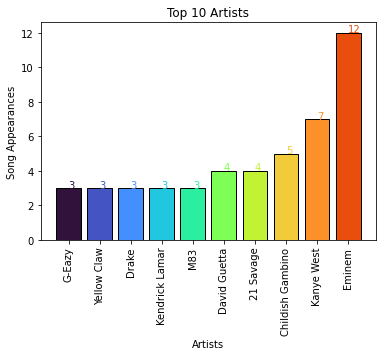

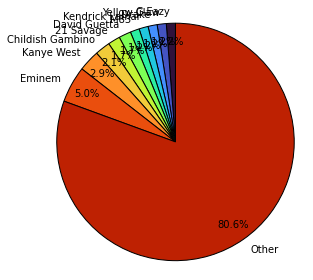

There are 216 unique genres in the playlist.


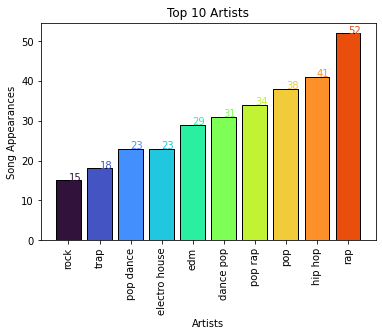

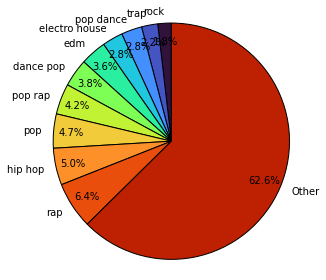

In [ ]:
from artistsgenres_dummies import artistsgenres_dummies
df_sta_ag, sta_num_artists, sta_num_genres = artistsgenres_dummies(df_sta)

Playlist to Update (Labelled Data)

There are 38 unique genres in the playlist.


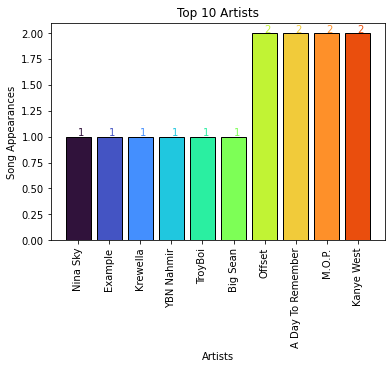

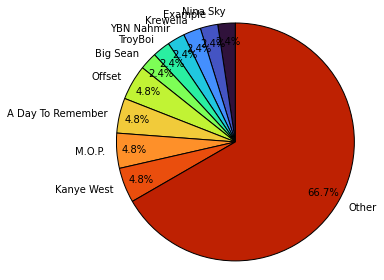

There are 63 unique genres in the playlist.


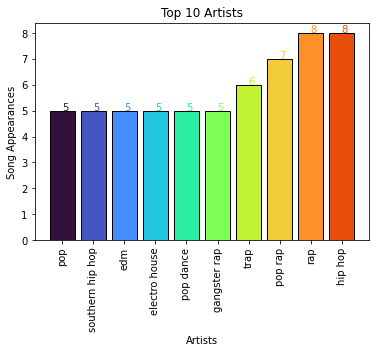

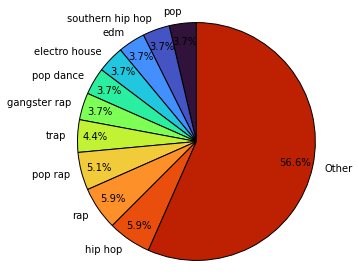

In [ ]:
df_p_ag, p_num_artists, p_num_genres = artistsgenres_dummies(df_p)

Both Playlists (Duplicates Removed)

There are 197 unique genres in the playlist.


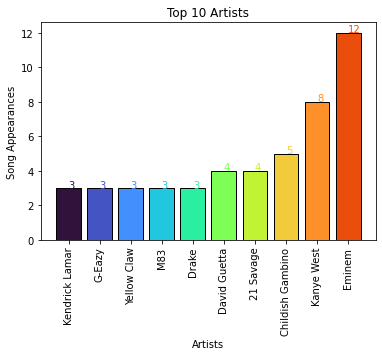

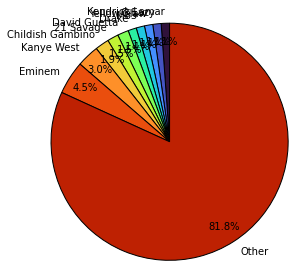

There are 218 unique genres in the playlist.


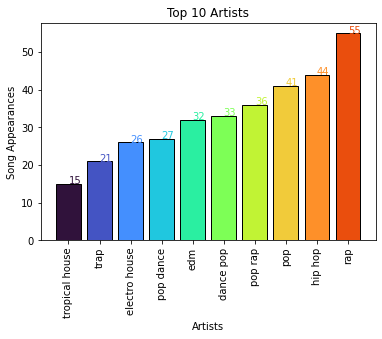

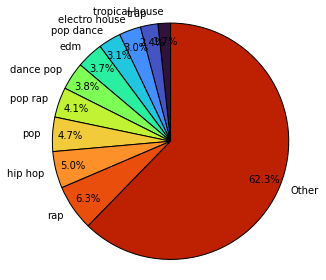

In [ ]:
df_ag, df_num_artists, df_num_genres = artistsgenres_dummies(df)

In [ ]:
df_ag.to_csv('Playlist_df_ag.csv', encoding='utf-8', index = False)

tot1 = df_ag.shape[0]
df_ag = df_ag.drop(df_ag[df_ag['date'] == ''].index)
tot2 = df_ag.shape[0]
tot = tot1-tot2
print("There were %i local songs within both playlists. All are removed as they don't have any song parameters." %tot)

There were 5 local songs within both playlists. All are removed as they don't have any song parameters.


In [ ]:
df_ag = df_ag.reset_index(drop=True)
df_ag

,id,song,song_fil,artists,artists_fil,album,album_fil,date,local,time,...,phonk,crunk,old school atlanta hip hop,hardcore hip hop,electra,rap metal,metalcore,hyphy,golden age hip hop,filthstep
0,158,Glimpse of Us,glimpse of us,Joji,joji,Glimpse of Us,glimpse of us,2022-06-10,No,233456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,116,Jimmy Cooks (feat. 21 Savage),jimmy cooks,"Drake, 21 Savage","drake, 21 savage","Honestly, Nevermind","honestly, nevermind",2022-06-17,No,218365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,133,I Like You (A Happier Song) (with Doja Cat),i like you (a happier song),"Post Malone, Doja Cat","post malone, doja cat",Twelve Carat Toothache,twelve carat toothache,2022-06-03,No,192841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,111,Belly Dancer,belly dancer,"Imanbek, BYOR","imanbek, byor",Belly Dancer,belly dancer,2022-02-18,No,151475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,134,Bad Habit,bad habit,Steve Lacy,steve lacy,Gemini Rights,gemini rights,2022-07-15,No,232067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,6,All I Want,all i want,A Day To Remember,a day to remember,What Separates Me From You,what separates me from you,2010-01-01,No,202640,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
151,8,All Nite - Getter Remix,all nite - getter remix,"Destructo, E-40, Too $hort, Getter","destructo, e-40, too $hort, getter",All Nite (Remixes),all nite (remixes),2017-06-30,No,177231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
152,9,All Signs Point to Lauderdale,all signs point to lauderdale,A Day To Remember,a day to remember,What Separates Me From You,what separates me from you,2010-01-01,No,197200,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
153,14,Ante Up (Robbin Hoodz Theory),ante up (robbin hoodz theory),M.O.P.,m.o.p.,Hip Hop 100 Hits - Urban rap & R n B anthems i...,hip hop 100 hits - urban rap & r n b anthems i...,2013-06-21,No,248693,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import re

df_trackparams = df_ag.iloc[:,7:21]
df_trackgenres = df_ag.iloc[:,-(df_num_genres):]
X = pd.concat([df_trackparams,df_trackgenres], axis = 1)
X = X.drop(['local'], 1)

X.to_csv('Playlist_X.csv', encoding='utf-8', index = False)

In [ ]:
X['date'] = X['date'].apply(lambda x: str(x))
X['date'] = X['date'].apply(lambda x: re.split('-',x)[0])
X['date'] = X['date'].apply(lambda x: int(x))
X

,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,phonk,crunk,old school atlanta hip hop,hardcore hip hop,electra,rap metal,metalcore,hyphy,golden age hip hop,filthstep
0,2022,233456,0.440,0.317,8.0,-9.258,1.0,0.0531,0.891000,0.000005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022,218365,0.529,0.673,0.0,-4.711,1.0,0.1750,0.000307,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022,192841,0.733,0.670,5.0,-6.009,1.0,0.0751,0.121000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,151475,0.845,0.797,1.0,-4.984,1.0,0.1390,0.058200,0.000006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022,232067,0.686,0.494,1.0,-7.093,1.0,0.0355,0.613000,0.000058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2010,202640,0.342,0.981,2.0,-3.228,0.0,0.1400,0.000025,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
151,2017,177231,0.726,0.928,0.0,-4.454,1.0,0.0934,0.001790,0.062700,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
152,2010,197200,0.420,0.983,10.0,-3.437,1.0,0.1130,0.000263,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
153,2013,248693,0.673,0.797,1.0,-4.861,1.0,0.2700,0.004590,0.000002,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.iloc[:,:6] = preprocessing.StandardScaler().fit(X.iloc[:,:6]).transform(X.iloc[:,:6].astype(float))
X.iloc[:,7:13] = preprocessing.StandardScaler().fit(X.iloc[:,7:13]).transform(X.iloc[:,7:13].astype(float))
X


,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,phonk,crunk,old school atlanta hip hop,hardcore hip hop,electra,rap metal,metalcore,hyphy,golden age hip hop,filthstep
0,1.011059,0.148743,-1.735792,-2.653052,0.788013,-1.366922,1.0,-0.721547,3.948658,-0.401097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.011059,-0.089334,-1.109854,-0.416129,-1.402875,0.489392,1.0,0.367094,-0.660908,-0.401108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.011059,-0.492004,0.324880,-0.434980,-0.033570,-0.040517,1.0,-0.525074,-0.036291,-0.401120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.011059,-1.144598,1.112577,0.363024,-1.129014,0.377940,1.0,0.045592,-0.361297,-0.401093,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.011059,0.126830,-0.005672,-1.540874,-1.129014,-0.483060,1.0,-0.878726,2.509937,-0.400843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,-0.114357,-0.337414,-2.425027,1.519186,-0.855153,1.094827,0.0,0.054523,-0.662366,-0.401120,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
151,0.542136,-0.738269,0.275649,1.186161,-1.402875,0.594312,1.0,-0.361644,-0.653233,-0.102103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
152,-0.114357,-0.423236,-1.876452,1.531753,1.335735,1.009503,1.0,-0.186604,-0.661136,-0.401120,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
153,0.166997,0.389123,-0.097101,0.363024,-1.129014,0.428154,1.0,1.215502,-0.638742,-0.401108,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# y = df_ag.iloc[:,25:26]
j = df_ag.columns.get_loc("in playlist")
y = df_ag.iloc[:,j:j+1]
print(np.array(y).reshape(1,-1))

[[-2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1]]


In [ ]:
y_pos = y[y['in playlist'] == 1]
y_unl = y[y['in playlist'] == -2]

X_pos = X.loc[y_pos.index]
X_unl = X.loc[y_unl.index]

pos_index = y_pos.index
unl_index = y_unl.index

pos = pd.concat((y_pos,X_pos),axis=1)
unl = pd.concat((y_unl,X_unl),axis=1)

num_pos = len(y_pos)
num_unl = len(y_unl)

print("There are %i songs in the current playlist." %num_pos)
print("There are %i songs in your music library." %num_unl)

There are 19 songs in the current playlist.
There are 136 songs in your music library.


In [ ]:
unl

,in playlist,date,time,danceability,energy,key,loudness,mode,speechiness,acousticness,...,phonk,crunk,old school atlanta hip hop,hardcore hip hop,electra,rap metal,metalcore,hyphy,golden age hip hop,filthstep
0,-2,1.011059,0.148743,-1.735792,-2.653052,0.788013,-1.366922,1.0,-0.721547,3.948658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2,1.011059,-0.089334,-1.109854,-0.416129,-1.402875,0.489392,1.0,0.367094,-0.660908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2,1.011059,-0.492004,0.324880,-0.434980,-0.033570,-0.040517,1.0,-0.525074,-0.036291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2,1.011059,-1.144598,1.112577,0.363024,-1.129014,0.377940,1.0,0.045592,-0.361297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2,1.011059,0.126830,-0.005672,-1.540874,-1.129014,-0.483060,1.0,-0.878726,2.509937,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-2,-0.770849,-0.389159,-1.714693,-0.139656,-0.033570,0.168099,0.0,-0.745660,0.279400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132,-2,0.542136,-1.586234,1.745547,-1.949301,-1.129014,-0.321393,1.0,-0.141951,-0.503099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,-2,-0.114357,-0.165770,0.402243,0.312756,-1.129014,-0.001325,0.0,-0.605449,0.124143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,-2,-0.020572,-0.032824,0.057625,1.324398,-0.033570,0.330174,0.0,-0.798350,-0.657658,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PUL

Create X-(10-10)-1 Bindary NN Classifier

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense

# def classification_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
#     model.add(Dense(10, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))

#     # compile model
#     model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
#     return model

In [ ]:
# import random
# rnd = np.random.RandomState(1)

# def get_randoms(unl,num_pos):

#     unl_indicies = unl.index.tolist()

#     unl_rand = unl.sample(n=num_pos, random_state=rnd)
#     unl_rand_indicies = unl_rand.index.tolist()

#     unl_rand.iloc[:,0] = 0

#     unl_others = unl.drop(unl_rand_indicies)
#     unl_others_indicies = unl_others.index.tolist()

#     return unl_rand, unl_rand_indicies, unl_others, unl_others_indicies

In [ ]:
# d_counts = np.zeros(unl.shape[0], dtype=np.int64)
# d_sums = np.zeros(unl.shape[0], dtype=np.float32)

# for i in range(8):

#     print("Training %i/8"%i)

#     unl_rand, unl_rand_indicies, unl_others, unl_others_indicies = get_randoms(unl,pos.shape[0])

#     dsample = pd.concat((unl_rand,pos), axis = 0)

#     X = dsample.drop(['in playlist'], axis =1)
#     y = dsample.iloc[:,0]

#     model = classification_model()
#     model.fit(X, y, epochs=800, verbose=0, batch_size = 10)

#     X_others = unl_others.drop(['in playlist'], axis =1)
#     y_others = unl_others.iloc[:,0]

#     pred = model.predict(X_others,batch_size=1)
#     # print(pred.size)
#     # for i in range(10):
#     #     # print(np.round(pred[i],2))
#     #     print(pred[i][0],y_tr.iloc[i])

#     for i in range(len(unl_others_indicies)):
#         ind = unl_others_indicies
#         d_counts[ind[i]] += 1
#         d_sums[ind[i]] += pred[i]

#     p = (d_sums/d_counts).round(2)

#     lo = 0.20; hi = 0.80

#     p = p.reshape(-1,1)

#     colors = 'brg'

#     x = list(range(p.shape[0]))

#     plt.scatter(x,p, c=p,cmap =colors)
#     plt.axhline(y=hi, color = 'lime')
#     plt.axhline(y=lo, color = 'blue')
#     plt.show()

[0, 1, 2, 3, 4, 5, 6, 7]
0.19943072 	 1
0.99999636 	 1
0.999979 	 1
0.99929106 	 1
0.37515512 	 1
0.9962664 	 1
0.5937223 	 1
0.0011383845 	 1
5.1649795 	 8

[0.65]
0.6456224322319031


c:\Users\mackt\Python\Spotify Playlist Generator\mult_pr_NN.py:115: RuntimeWarning: invalid value encountered in true_divide
  p = (d_sums/d_counts).round(2)


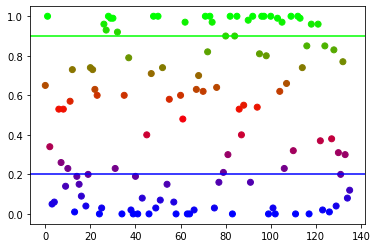

In [ ]:
from mult_pr_NN import mult_pr_NN

p = mult_pr_NN(unl,pos,X)

In [ ]:
print(p)

[[0.63]
 [1.  ]
 [0.09]
 [0.1 ]
 [0.2 ]
 [ nan]
 [0.49]
 [0.28]
 [0.66]
 [0.33]
 [0.26]
 [0.73]
 [0.9 ]
 [0.13]
 [0.17]
 [0.33]
 [0.03]
 [ nan]
 [0.04]
 [0.15]
 [0.66]
 [0.69]
 [0.66]
 [0.86]
 [0.  ]
 [0.01]
 [0.97]
 [0.95]
 [1.  ]
 [0.74]
 [0.91]
 [0.39]
 [0.9 ]
 [ nan]
 [0.  ]
 [0.49]
 [ nan]
 [0.87]
 [0.12]
 [0.04]
 [0.56]
 [0.  ]
 [ nan]
 [0.01]
 [ nan]
 [0.52]
 [0.02]
 [0.76]
 [1.  ]
 [0.03]
 [1.  ]
 [0.05]
 [0.38]
 [ nan]
 [0.43]
 [0.4 ]
 [ nan]
 [0.2 ]
 [0.05]
 [ nan]
 [0.75]
 [0.43]
 [0.91]
 [0.04]
 [0.  ]
 [ nan]
 [0.  ]
 [0.79]
 [0.16]
 [ nan]
 [0.85]
 [1.  ]
 [0.9 ]
 [1.  ]
 [0.92]
 [0.14]
 [0.5 ]
 [0.25]
 [ nan]
 [0.4 ]
 [0.83]
 [0.17]
 [1.  ]
 [0.02]
 [0.98]
 [0.99]
 [0.87]
 [0.52]
 [0.35]
 [ nan]
 [0.96]
 [0.28]
 [1.  ]
 [ nan]
 [0.34]
 [0.83]
 [1.  ]
 [1.  ]
 [0.83]
 [0.  ]
 [0.98]
 [0.23]
 [0.  ]
 [0.99]
 [0.96]
 [0.96]
 [0.17]
 [0.6 ]
 [ nan]
 [1.  ]
 [0.06]
 [0.  ]
 [1.  ]
 [1.  ]
 [0.89]
 [ nan]
 [0.85]
 [0.01]
 [0.94]
 [ nan]
 [ nan]
 [0.96]
 [0.29]
 [0.03]
 [0.74]


In [ ]:
s = (pos.shape[0],1)
pp = np.ones(s)

p = np.concatenate((p,pp), axis=0)

In [ ]:
from prettytable import PrettyTable

t = PrettyTable(['Prob','Song'])
song_name = pd.DataFrame(df_ag['song']).to_numpy()
in_playlist = pd.DataFrame(df_ag['in playlist']).to_numpy()
print(in_playlist.shape)
print(p.shape)
song_name_p = np.concatenate((song_name,p, in_playlist),axis = 1)
song_name_p_sorted = song_name_p[song_name_p[:,1].argsort()]
song_name_p_sorted = np.flip(song_name_p_sorted, axis=None)
song_name_p_sorted = np.delete(song_name_p_sorted, np.where(song_name_p_sorted[:, 0] == 1)[0], axis=0)
song_name_p_sorted = song_name_p_sorted[:,1:]
# print(song_name_p_sorted)
for i in range(unl.shape[0]):
    t.add_row([song_name_p_sorted[i][0], song_name_p_sorted[i][1]])
print(t)

(155, 1)
(155, 1)
+------+--------------------------------------------------------------------------------------------------+
| Prob |                                               Song                                               |
+------+--------------------------------------------------------------------------------------------------+
| 1.0  |          Turn Up The Sunshine - PNAU Remix / From 'Minions: The Rise of Gru' Soundtrack          |
| nan  |                                               1x1                                                |
| nan  |                                          100 Grandkids                                           |
| 1.0  |                               Baila Conmigo - Willy William Remix                                |
| nan  |                                       Light It Up - Remix                                        |
| 1.0  |                                          Midnight City                                           |
| 1.0  |  

In [ ]:
df_ag['probability'] = p
df_ag.shape
rec = df_ag[df_ag['in playlist'] == -2]
rec = rec.sort_values(by=['probability'], ascending=False)
rec.to_csv('Playlist_rec.csv', encoding='utf-8', index = False)
# rec_songs = rec['uri'].values.tolist()

In [ ]:
from get_credentials import get_credentials
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

cid,secret = get_credentials()
scope = 'playlist-modify-public'
username = '12167982535'

token = SpotifyOAuth(client_id=cid, client_secret=secret, redirect_uri = 'http://localhost/', scope=scope,username=username)
sp = spotipy.Spotify(auth_manager=token)

playlist_name = input("\nWhat's the playlist name? ")
sp.user_playlist_create(username, playlist_name, public=True, description='Suggested Songs')
print(f"\nPlaylist '%s' was created successfully."%playlist_name)

# python3 -m venv spotifyplaylistgenerator
# python -m venv .env
# .env\Scripts\activate
# set SPOTIPY_CLIENT_ID=
# set SPOTIPY_CLIENT_SECRET=
# set REDIRECT_URI=http://localhost/

in txt


HTTP Error for POST to https://api.spotify.com/v1/users/12167982535/playlists with Params: {} returned 400 due to Missing required field: name


SpotifyException: http status: 400, code:-1 - https://api.spotify.com/v1/users/12167982535/playlists:
 Missing required field: name, reason: None

In [ ]:
import math
rec_songs = rec[rec['probability'] >= 0.9]

pre_playlist = sp.user_playlists(user=username)
playlist = pre_playlist['items'][0]['id']

print(len(rec_songs))
for i in range(math.floor(len(rec_songs)/100)):
    rec_songs_p = rec_songs[i*100:(i+1)*100]
    rec_songs_p= rec_songs_p['uri'].values.tolist()
    sp.user_playlist_add_tracks(user = username, playlist_id=playlist,tracks=rec_songs_p)
rec_songs_p = rec_songs[math.floor(len(rec_songs)/100)*100:(math.floor(len(rec_songs)/100)+1)*100]
rec_songs_p= rec_songs_p['uri'].values.tolist()
sp.user_playlist_add_tracks(user = username, playlist_id=playlist,tracks=rec_songs_p)


271


{'snapshot_id': 'OCxkOTlmZmJiNWZkODYzNjVmOTc0YTYxYmRjMWE3ZWRhY2IxODZmYjNm'}